In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from dup_col import duplicate_columns
import warnings

# warnings.simplefilter('ignore')

In [2]:
census_path = './data/cities/cb_2022_us_place_500k.shp'

In [3]:
census_gdf = gpd.read_file(census_path, geometry='geometry')

In [4]:
census_gdf.head()

STATEFP PLACEFP   PLACENS          AFFGEOID    GEOID            NAME  \
0      06   55156  02411359  1600000US0655156  0655156        Palmdale   
1      06   22804  02410455  1600000US0622804  0622804       Escondido   
2      12   16525  02404197  1600000US1216525  1216525   Daytona Beach   
3      12   05150  02405235  1600000US1205150  1205150  Belleair Shore   
4      17   30926  02394961  1600000US1730926  1730926    Granite City   

              NAMELSAD STUSPS  STATE_NAME LSAD      ALAND   AWATER  \
0        Palmdale city     CA  California   25  274705334   629569   
1       Escondido city     CA  California   25   96726218   276445   
2   Daytona Beach city     FL     Florida   25  174516209  6887767   
3  Belleair Shore town     FL     Florida   43     154028   432786   
4    Granite City city     IL    Illinois   25   49248341  4048185   

                                            geometry  
0  POLYGON ((-118.28773 34.58140, -118.28770 34.5...  
1  MULTIPOLYGON (((-117.02372 33.18060, -117.0219...  
2  MULTIPOLYGON (((-81.12724 29.13686, -81.12568 ...  
3  POLYGON ((-82.84783 27.91020, -82.84485 27.924...  
4  MULTIPOLYGON (((-90.11123 38.70289, -90.10613 ...

In [5]:
census_gdf.shape

(32466, 13)

In [6]:
sd_gdf = census_gdf[(census_gdf['NAME'] == 'San Diego') & (census_gdf['STUSPS'] == 'CA')]

In [7]:
sd_gdf

STATEFP PLACEFP   PLACENS          AFFGEOID    GEOID       NAME  \
21364      06   66000  02411782  1600000US0666000  0666000  San Diego   

             NAMELSAD STUSPS  STATE_NAME LSAD      ALAND     AWATER  \
21364  San Diego city     CA  California   25  844031824  120532755   

                                                geometry  
21364  MULTIPOLYGON (((-116.93192 32.64961, -116.9314...

<Axes: >

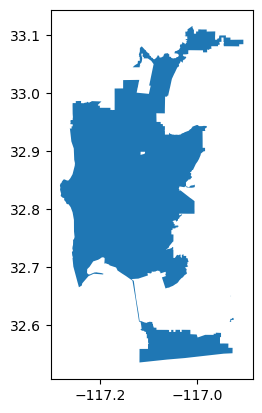

In [8]:
sd_gdf.plot()

In [9]:
# sd_gdf.explore()

In [10]:
dc_gdf = census_gdf[census_gdf['STATE_NAME'] == 'District of Columbia']

In [11]:
dc_gdf

STATEFP PLACEFP   PLACENS          AFFGEOID    GEOID        NAME  \
4747      11   50000  02390665  1600000US1150000  1150000  Washington   

             NAMELSAD STUSPS            STATE_NAME LSAD      ALAND    AWATER  \
4747  Washington city     DC  District of Columbia   25  158316184  18709787   

                                               geometry  
4747  POLYGON ((-77.11976 38.93434, -77.11253 38.940...

<Axes: >

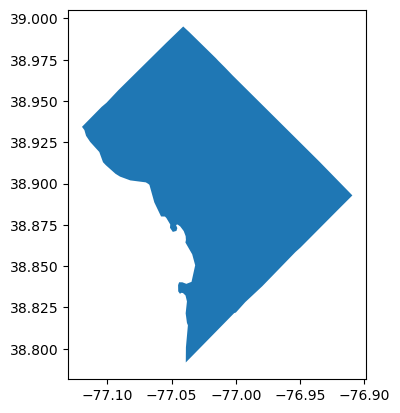

In [12]:
dc_gdf.plot()

## Census Tracts

In [13]:
tracts_path = './data/tracts/cb_2022_us_tract_5m.shp'

In [14]:
tracts_gdf = gpd.read_file(tracts_path, geometry='geometry')

In [15]:
tracts_gdf.head()

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID     NAME  \
0      01      097  006505  1400000US01097006505  01097006505    65.05   
1      05      131  001202  1400000US05131001202  05131001202    12.02   
2      06      059  099511  1400000US06059099511  06059099511   995.11   
3      06      037  620904  1400000US06037620904  06037620904  6209.04   
4      06      001  428500  1400000US06001428500  06001428500     4285   

               NAMELSAD STUSPS          NAMELSADCO  STATE_NAME LSAD     ALAND  \
0    Census Tract 65.05     AL       Mobile County     Alabama   CT  94686529   
1    Census Tract 12.02     AR    Sebastian County    Arkansas   CT   4381207   
2   Census Tract 995.11     CA       Orange County  California   CT    944442   
3  Census Tract 6209.04     CA  Los Angeles County  California   CT    576178   
4     Census Tract 4285     CA      Alameda County  California   CT    624197   

    AWATER                                           geometry  
0   501122  POLYGON ((-88.40601 30.58976, -88.38573 30.615...  
1    34047  POLYGON ((-94.43277 35.33941, -94.39136 35.338...  
2  1356526  POLYGON ((-118.11464 33.74461, -118.11305 33.7...  
3   413509  POLYGON ((-118.41269 33.88388, -118.40768 33.8...  
4   383522  POLYGON ((-122.26360 37.76743, -122.25575 37.7...

In [16]:
tracts_gdf.columns.values

array(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'NAMELSADCO', 'STATE_NAME', 'LSAD', 'ALAND',
       'AWATER', 'geometry'], dtype=object)

In [17]:
dc_tracts = tracts_gdf[tracts_gdf['STATE_NAME'] == 'District of Columbia']

In [18]:
dc_tracts.head()

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID   NAME  \
743       11      001  004703  1400000US11001004703  11001004703  47.03   
1100      11      001  008410  1400000US11001008410  11001008410  84.10   
1101      11      001  002703  1400000US11001002703  11001002703  27.03   
1189      11      001  002702  1400000US11001002702  11001002702  27.02   
1197      11      001  008002  1400000US11001008002  11001008002  80.02   

                NAMELSAD STUSPS            NAMELSADCO            STATE_NAME  \
743   Census Tract 47.03     DC  District of Columbia  District of Columbia   
1100  Census Tract 84.10     DC  District of Columbia  District of Columbia   
1101  Census Tract 27.03     DC  District of Columbia  District of Columbia   
1189  Census Tract 27.02     DC  District of Columbia  District of Columbia   
1197  Census Tract 80.02     DC  District of Columbia  District of Columbia   

     LSAD   ALAND  AWATER                                           geometry  
743    CT  124124       0  POLYGON ((-77.02192 38.90294, -77.01481 38.905...  
1100   CT  219939       0  POLYGON ((-76.99313 38.90400, -76.98406 38.900...  
1101   CT  163863       0  POLYGON ((-77.04419 38.93274, -77.03645 38.934...  
1189   CT  479022    7175  POLYGON ((-77.05050 38.93322, -77.04419 38.932...  
1197   CT  578961       0  POLYGON ((-76.99024 38.89357, -76.98365 38.893...

<Axes: >

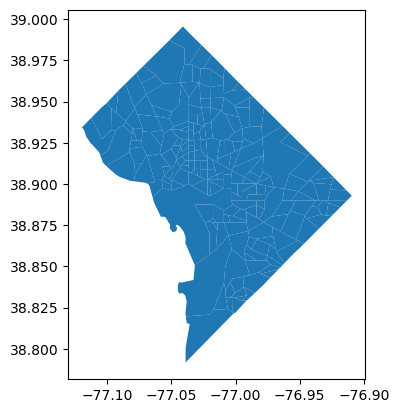

In [19]:
dc_tracts.plot()

In [20]:
sd_tracts = tracts_gdf[(tracts_gdf['STATE_NAME'] == 'California') & (tracts_gdf['COUNTYFP'] == '073')]

<Axes: >

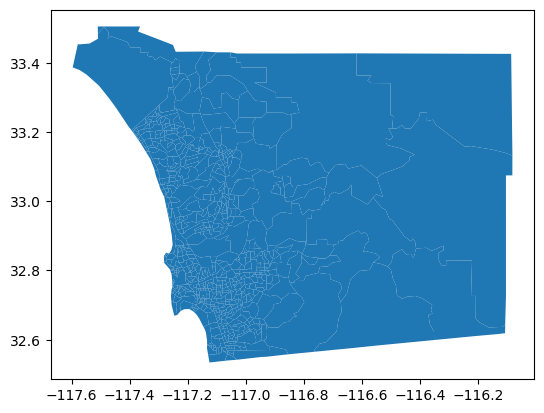

In [21]:
sd_tracts.plot()

In [22]:
# sd_tracts.explore()

In [23]:
duplicate_columns(sd_tracts, sd_gdf)

Duplicate column names found:
- geometry
- AFFGEOID
- GEOID
- AWATER
- ALAND
- STUSPS
- LSAD
- STATE_NAME
- NAMELSAD
- STATEFP
- NAME


In [24]:
# sd_variables = ['COUNTYFP', 'NAMELSADCO', 'TRACTCE']

In [25]:
# sd_city = sd_tracts[sd_variables + ['geometry']]

In [26]:
# sd_join = gpd.sjoin(sd_city, sd_gdf, how='left', predicate='intersects')

In [27]:
# sd_join = sd_join.drop(columns=['index_right'])

In [28]:
sd_city = gpd.overlay(sd_gdf, sd_tracts, how='identity')

C:\Users\Plgra\miniconda3\envs\veuno\Lib\site-packages\geopandas\geodataframe.py:1813: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
C:\Users\Plgra\AppData\Local\Temp\ipykernel_19052\963029373.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 76 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  sd_city = gpd.overlay(sd_gdf, sd_tracts, how='identity')


In [29]:
sd_city.columns.values

array(['STATEFP_1', 'PLACEFP', 'PLACENS', 'AFFGEOID_1', 'GEOID_1',
       'NAME_1', 'NAMELSAD_1', 'STUSPS_1', 'STATE_NAME_1', 'LSAD_1',
       'ALAND_1', 'AWATER_1', 'STATEFP_2', 'COUNTYFP', 'TRACTCE',
       'AFFGEOID_2', 'GEOID_2', 'NAME_2', 'NAMELSAD_2', 'STUSPS_2',
       'NAMELSADCO', 'STATE_NAME_2', 'LSAD_2', 'ALAND_2', 'AWATER_2',
       'geometry'], dtype=object)

## US Schools

In [30]:
schools_path = './data/schools/EDGE_GEOCODE_PUBLICSCH_2223.shp'

In [31]:
schools = gpd.read_file(schools_path, geometry='geometry')

In [32]:
schools.head()

NCESSCH    LEAID                               NAME OPSTFIPS  \
0  010000500870  0100005          Albertville Middle School       01   
1  010000500871  0100005            Albertville High School       01   
2  010000500879  0100005    Albertville Intermediate School       01   
3  010000500889  0100005      Albertville Elementary School       01   
4  010000501616  0100005  Albertville Kindergarten and PreK       01   

                STREET         CITY STATE    ZIP STFIP   CNTY  ... CBSATYPE  \
0    600 E Alabama Ave  Albertville    AL  35950    01  01095  ...        2   
1     402 E McCord Ave  Albertville    AL  35950    01  01095  ...        2   
2   901 W McKinney Ave  Albertville    AL  35950    01  01095  ...        2   
3   145 West End Drive  Albertville    AL  35950    01  01095  ...        2   
4  257 Country Club Rd  Albertville    AL  35951    01  01095  ...        2   

  CSA  NMCSA  NECTA NMNECTA    CD   SLDL   SLDU SCHOOLYEAR  \
0   N      N      N       N  0104  01026  01009  2022-2023   
1   N      N      N       N  0104  01026  01009  2022-2023   
2   N      N      N       N  0104  01026  01009  2022-2023   
3   N      N      N       N  0104  01026  01009  2022-2023   
4   N      N      N       N  0104  01026  01009  2022-2023   

                     geometry  
0  POINT (-86.20620 34.26020)  
1  POINT (-86.20490 34.26220)  
2  POINT (-86.22010 34.27330)  
3  POINT (-86.22181 34.25270)  
4  POINT (-86.19330 34.28980)  

[5 rows x 26 columns]

In [33]:
ca_sd = schools[schools['STATE'] == 'CA']

In [34]:
sd_sd = ca_sd[ca_sd['CITY'] == 'San Diego']

In [35]:
sd_sd

NCESSCH    LEAID                                     NAME  \
6199   060013811406  0600138                     San Diego County ROP   
6412   060146814198  0601468                 America's Finest Charter   
6425   060148312630  0601483          San Diego Global Vision Academy   
6444   060150313795  0601503                                  Elevate   
6453   060151511386  0601515                High Tech High Media Arts   
...             ...      ...                                      ...   
15955  069103012496  0691030                                  Monarch   
15957  069103013682  0691030               San Diego County Community   
15958  069103013693  0691030                   San Diego County Court   
15959  069103014068  0691030    HOPE Infant-Toddler Special Education   
16032  069105212994  0691052  Urban Corps of San Diego County Charter   

      OPSTFIPS                        STREET       CITY STATE    ZIP STFIP  \
6199        06          6401 Linda Vista Rd.  San Diego    CA  92111    06   
6412        06                  730 45th St.  San Diego    CA  92102    06   
6425        06                  3430 Sch St.  San Diego    CA  92116    06   
6444        06         2285 Murray Ridge Rd.  San Diego    CA  92123    06   
6453        06              2230 Truxtun Rd.  San Diego    CA  92106    06   
...        ...                           ...        ...   ...    ...   ...   
15955       06              1625 Newton Ave.  San Diego    CA  92113    06   
15957       06  6401 Linda Vista Rd. Rm. 216  San Diego    CA  92111    06   
15958       06          2801 Meadow Lark Dr.  San Diego    CA  92123    06   
15959       06          6401 Linda Vista Rd.  San Diego    CA  92111    06   
16032       06            3127 Jefferson St.  San Diego    CA  92110    06   

        CNTY  ... CBSATYPE CSA  NMCSA  NECTA NMNECTA    CD   SLDL   SLDU  \
6199   06073  ...        1   N      N      N       N  0653  06079  06039   
6412   06073  ...        1   N      N      N       N  0651  06080  06040   
6425   06073  ...        1   N      N      N       N  0653  06078  06039   
6444   06073  ...        1   N      N      N       N  0653  06079  06039   
6453   06073  ...        1   N      N      N       N  0652  06078  06039   
...      ...  ...      ...  ..    ...    ...     ...   ...    ...    ...   
15955  06073  ...        1   N      N      N       N  0651  06080  06040   
15957  06073  ...        1   N      N      N       N  0653  06079  06039   
15958  06073  ...        1   N      N      N       N  0653  06079  06039   
15959  06073  ...        1   N      N      N       N  0653  06079  06039   
16032  06073  ...        1   N      N      N       N  0652  06078  06039   

      SCHOOLYEAR                     geometry  
6199   2022-2023  POINT (-117.17986 32.76963)  
6412   2022-2023  POINT (-117.09805 32.71284)  
6425   2022-2023  POINT (-117.11906 32.76264)  
6444   2022-2023  POINT (-117.14416 32.78656)  
6453   2022-2023  POINT (-117.21984 32.73461)  
...          ...                          ...  
15955  2022-2023  POINT (-117.15040 32.70240)  
15957  2022-2023  POINT (-117.17986 32.76963)  
15958  2022-2023  POINT (-117.15372 32.79439)  
15959  2022-2023  POINT (-117.17986 32.76963)  
16032  2022-2023  POINT (-117.20344 32.75536)  

[288 rows x 26 columns]

<Axes: >

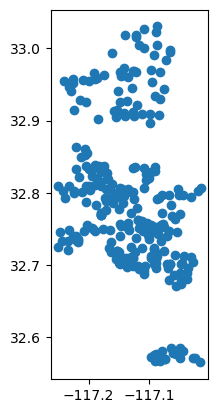

In [36]:
sd_sd.plot()

## Schools

In [37]:
dc_sd = schools[schools['STATE'] == 'DC']

<Axes: >

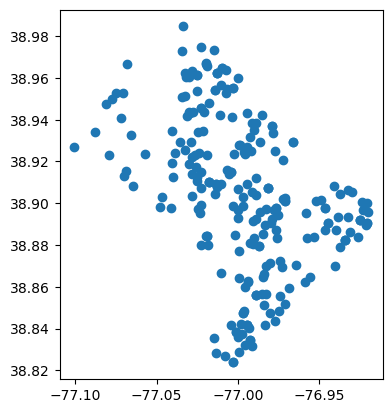

In [38]:
dc_sd.plot()

In [39]:
dc_sd.columns.values

array(['NCESSCH', 'LEAID', 'NAME', 'OPSTFIPS', 'STREET', 'CITY', 'STATE',
       'ZIP', 'STFIP', 'CNTY', 'NMCNTY', 'LOCALE', 'LAT', 'LON', 'CBSA',
       'NMCBSA', 'CBSATYPE', 'CSA', 'NMCSA', 'NECTA', 'NMNECTA', 'CD',
       'SLDL', 'SLDU', 'SCHOOLYEAR', 'geometry'], dtype=object)

In [40]:
dc_sd

NCESSCH    LEAID  \
19330  110000500456  1100005   
19331  110000800338  1100008   
19332  110000800382  1100008   
19333  110000800478  1100008   
19334  110000800479  1100008   
...             ...      ...   
19569  110011400538  1100114   
19570  110011500539  1100115   
19571  110011600545  1100116   
19572  110011700546  1100117   
19573  110011800778  1100118   

                                                    NAME OPSTFIPS  \
19330  Cesar Chavez Public Charter Schools for Public...       11   
19331                Friendship PCS - Collegiate Academy       11   
19332              Friendship PCS - Southeast Elementary       11   
19333                Friendship PCS - Blow Pierce Middle       11   
19334            Friendship PCS - Blow Pierce Elementary       11   
...                                                  ...      ...   
19569                                        I Dream PCS       11   
19570                                 Social Justice PCS       11   
19571                                Global Citizens PCS       11   
19572                                       LEARN DC PCS       11   
19573           DC Wildflower PCS - The Riverseed School       11   

                         STREET        CITY STATE    ZIP STFIP   CNTY  ...  \
19330      3701 HAYES STREET NE  Washington    DC  20019    11  11001  ...   
19331  4095 MINNESOTA AVENUE NE  Washington    DC  20019    11  11001  ...   
19332    645 MILWAUKEE PLACE SE  Washington    DC  20032    11  11001  ...   
19333        725 19TH STREET NE  Washington    DC  20002    11  11001  ...   
19334        725 19TH STREET NE  Washington    DC  20002    11  11001  ...   
...                         ...         ...   ...    ...   ...    ...  ...   
19569     2220 BRANCH AVENUE SE  Washington    DC  20020    11  11001  ...   
19570        5450 3RD STREET NE  Washington    DC  20011    11  11001  ...   
19571  4095 MINNESOTA AVENUE NE  Washington    DC  20019    11  11001  ...   
19572      100 DUNCAN STREET SW  Washington    DC  20032    11  11001  ...   
19573            913 55TH ST NE  WASHINGTON    DC  20019    11  11001  ...   

      CBSATYPE  CSA                                           NMCSA  NECTA  \
19330        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19331        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19332        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19333        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19334        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
...        ...  ...                                             ...    ...   
19569        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19570        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19571        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19572        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   
19573        1  548  Washington-Baltimore-Arlington, DC-MD-VA-WV-PA      N   

      NMNECTA    CD SLDL   SLDU SCHOOLYEAR                    geometry  
19330       N  1198    N  11007  2022-2023  POINT (-76.94906 38.90134)  
19331       N  1198    N  11007  2022-2023  POINT (-76.94631 38.89751)  
19332       N  1198    N  11008  2022-2023  POINT (-76.99700 38.84754)  
19333       N  1198    N  11007  2022-2023  POINT (-76.97637 38.89784)  
19334       N  1198    N  11007  2022-2023  POINT (-76.97637 38.89784)  
...       ...   ...  ...    ...        ...                         ...  
19569       N  1198    N  11007  2022-2023  POINT (-76.95857 38.86250)  
19570       N  1198    N  11005  2022-2023  POINT (-77.00273 38.95496)  
19571       N  1198    N  11007  2022-2023  POINT (-76.94631 38.89751)  
19572       N  1198    N  11008  2022-2023  POINT (-77.01475 38.83526)  
19573       N  1198    N  11007  2022-2023  POINT (-76.92074 38.90024)  

[243 rows x 26 columns]

In [41]:
dc_gdf.columns.values

array(['STATEFP', 'PLACEFP', 'PLACENS', 'AFFGEOID', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry'], dtype=object)

## Hospitals

In [42]:
us_h_path = './data/hospitals/Hospitals.shp'

In [43]:
us_h = gpd.read_file(us_h_path, geometry='geometry')

In [44]:
us_h.columns.values

array(['OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'STATE_ID', 'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF',
       'BEDS', 'TRAUMA', 'HELIPAD', 'geometry'], dtype=object)

In [45]:
cadc_h = us_h[us_h['STATE'].isin(['DC','CA'])]

In [46]:
sdsc_h = cadc_h[cadc_h['CITY'].isin(['SAN DIEGO', 'WASHINGTON'])]

## DC Bus Stops

In [47]:
dc__bs_path = './data/dc_bus/Metro_Bus_Stops/Metro_Bus_Stops.shp'

In [48]:
dc_bs_gdf = gpd.read_file(dc__bs_path, geometry='geometry')

In [49]:
dc_bs_gdf.columns.values

array(['EGIS_ID', 'REG_ID', 'BSTP_GEO_I', 'BSTP_OPS_T', 'BSTP_EFF_D',
       'BSTP_TCD', 'AT_STR', 'ON_STR', 'BSTP_HDG', 'BSTP_POS_T',
       'BSTP_LDC', 'BSTP_MSG_T', 'BSTP_LON', 'BSTP_LAT', 'BSTP_LAT_L',
       'BSTP_INV_S', 'BSTP_INV_1', 'BSTP_BNH_C', 'BSTP_BST_T',
       'BSTP_IFC_O', 'BSTP_HAS_B', 'BSTP_HAS_P', 'BSTP_HAS_1',
       'BSTP_HAS_2', 'BSTP_PDP_S', 'BSTP_PDP_M', 'BSTP_PDP_O',
       'BSTP_PDP_H', 'BSTP_HAS_3', 'BSTP_BDR_P', 'BSTP_SWK_W',
       'BSTP_SWK_H', 'BSTP_SWK_1', 'BSTP_SWK_S', 'BSTP_SWK_O',
       'BSTP_SWK_I', 'ONS_CRP_SL', 'ONS_CRP', 'OFS_CRP', 'AT_STR_ABS',
       'AT_STR_OSS', 'ONS_CWK', 'OFS_CWK', 'AT_STR_A_1', 'AT_STR_O_1',
       'ON_STR_STS', 'ON_STR_PDC', 'AT_STR_PDC', 'BSTP_PRK_R',
       'BSTP_NPK_Z', 'CNF_NPK_SN', 'STR_LGT_WT', 'BSTP_HAS_L',
       'BSTP_ACC_R', 'BSTP_BRDG_', 'BSTP_HAS_4', 'BSTP_HAS_5',
       'METRO_ACCS', 'WARD_ID', 'ANC_ID', 'SMD_ID', 'ROUTEID', 'MEASURE',
       'OFFSET', 'BLOCKKEY', 'BLOCKFACEK', 'GIS_ID', 'SE_ANNO_CA',
       

In [50]:
dc_bs_l = ['GIS_ID']

In [51]:
dc_bs = dc_bs_gdf[dc_bs_l + ['geometry']]

## SD Transit

In [52]:
ts_path = './data/sd_transit/transit_stops_datasd/transit_stops_datasd.shp'

In [53]:
sd_ts = gpd.read_file(ts_path, geometry='geometry')

In [54]:
sd_ts.head()

objectid    stop_uid stop_id  stop_code                        stop_name  \
0         1  MTS_11tbro  11tbro          0              11th Ave & Broadway   
1         2    MTS_12tS    12tS          0          12th & Imperial Station   
2         3    MTS_imtS    imtS          0  12th & Imperial Station Bayside   
3         4   MTS_imp12   imp12          0   12th & Imperial Transit Center   
4         5    MTS_24tS    24tS          0              24th Street Station   

    stop_lat    stop_lon stop_agncy  wheelchair intersec stop_place  \
0  32.716268 -117.154649        MTS           0     None       None   
1  32.706002 -117.153378        MTS           0     None       None   
2  32.705229 -117.154318        MTS           0     None       None   
3  32.705685 -117.152875        MTS           0     None       None   
4  32.661854 -117.108017        MTS           0     None       None   

  parent_sta        lat         lng                         geometry  
0       None  32.716263 -117.154637  POINT (6283416.644 1841597.236)  
1       None  32.705997 -117.153366  POINT (6283775.344 1837858.738)  
2       None  32.705224 -117.154306  POINT (6283483.745 1837580.038)  
3       None  32.705680 -117.152863  POINT (6283929.045 1837742.037)  
4       None  32.661849 -117.108005  POINT (6297596.645 1821678.338)

In [55]:
sd_bs = sd_ts[sd_ts['stop_agncy'] == 'MTS']

In [56]:
sd_bs.explore()

In [57]:
sd_bs.crs = 'epsg:4326'

In [58]:
sd_bs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
sd_gdf.crs = 'epsg:4326'

In [63]:
sd_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [66]:
bs_clp = gpd.overlay(sd_bs, sd_gdf, how='intersection')

In [67]:
bs_clp

Empty GeoDataFrame
Columns: [objectid, stop_uid, stop_id, stop_code, stop_name, stop_lat, stop_lon, stop_agncy, wheelchair, intersec, stop_place, parent_sta, lat, lng, STATEFP, PLACEFP, PLACENS, AFFGEOID, GEOID, NAME, NAMELSAD, STUSPS, STATE_NAME, LSAD, ALAND, AWATER, geometry]
Index: []

[0 rows x 27 columns]

<Axes: >

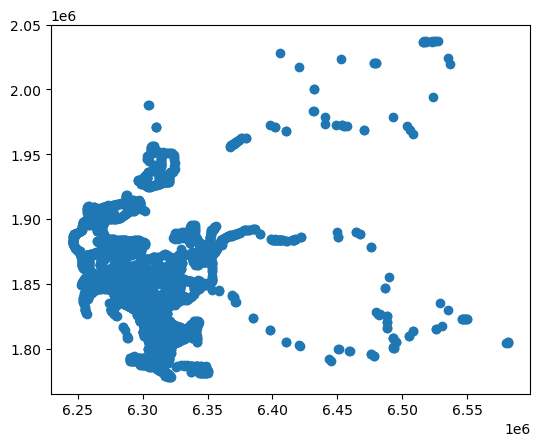

In [65]:
sd_bs.plot()

<Axes: >

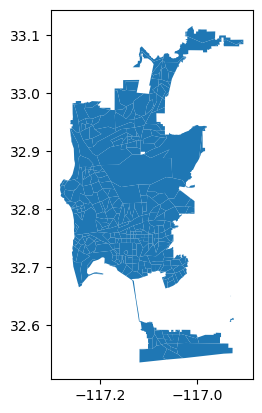

In [62]:
sd_city.plot()